# Decision Dependent Games Simulation
## Synthetic Linear Regression Problem with Location Families

We extend the linear regression example from Miller et. al. (http://arxiv.org/abs/2102.08570) to the multiplayer framework where the models of each player affect the distributions of data seen by all.

In [1]:
import numpy as np
import sys
import ipdb

sys.path.append("../")

sys.path.append("../utils/")
from utils_functions import *

from dd_game import *
from two_stage_player import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

The performative 2-player linear regression problem is set up as follows. For each player $k\in\{1,2\}$ we generate data

$$x^k \sim \mathcal{N}(0,\Sigma_{x^k}),\quad U^k \sim \mathcal{N}(0,\sigma_{y^k}), \quad y^k = \langle \beta^k, x^k \rangle + \langle \mu^k, \theta^k \rangle + \langle \gamma^k, \theta^{-k} \rangle + U^k$$

Where $x^k\in\mathbb{R}^d, y^k\in\mathbb{R}, U^k\in\mathbb{R}$. The performative effects are given by $\mu^k,\gamma^k$, which are drawn randomly by sampling a vector from the radius $\varepsilon^k$ spheres in $\mathbb{R}^{d_1+d_2}$ so that the distribution map for each player is $\varepsilon^k$-sensitive.
$$\varepsilon^k = \sqrt{||\mu^k||_2^2+||\gamma^k||_2^2}$$

# Configurations

In [2]:
d_1 = 2  # Dimension of each player's data/strategy
d_2 = 2

epsilon_1 = 1  # Epsilon sensitivity parameters
epsilon_2 = 1

Sigma_x_p1 = np.eye(d_1)  # Covariance of x^k
Sigma_x_p2 = np.eye(d_2)

sigma_y_p1 = 0  # Variance of y^k
sigma_y_p2 = 0

beta_p1 = np.random.normal(size=d_1)  # Linear parameter vector
beta_p2 = np.random.normal(size=d_2)

s_1 = sample_sphere(epsilon_1,d_1+d_2)  # Performativity parameters
mu_p1 = s_1[0:d_1]
gamma_p1 = s_1[d_1:]
s_2 = sample_sphere(epsilon_2,d_1+d_2)
mu_p2 = s_2[0:d_2]
gamma_p2 = s_2[d_2:]

#Fixing mu and gamma for testing purposes
if False:
    mu_p2 = np.array([2.1, -1.8])
    gamma_p2 = np.array([1.2, 0.9])
    mu_p1 = np.array([-2.8, 2.2])
    gamma_p1 = np.array([0.7, -0.3])

if True:
    #mu_p1 = np.array([0, 0])
    gamma_p1 = np.array([0, 0])
    #mu_p2 = np.array([0, 0])
    gamma_p2 = np.array([0, 0])

In [3]:
p1_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
p1_data_generating_func = sample_from_location_family

p2_data_params = (Sigma_x_p2, sigma_y_p2, beta_p2, mu_p2, gamma_p2)
p2_data_generating_func = sample_from_location_family

In [4]:
num_rounds_lst = [10, 100, 1000, 10000, 40000, 100000]
num_alternate_rounds = 50
num_test = 10000

# Run Game

In [5]:
#Initialize game with configurations specified above
p1_risks = []
p2_risks = []
theta_diff_p1 = []
theta_diff_p2 = []

for num_rounds in num_rounds_lst:
    player_two = TwoStagePlayer()
    player_one = TwoStagePlayer()
    game = DecisionDependentGame(player_one, player_two,
                                 p1_data_params, p2_data_params,
                                 p1_data_generating_func, p2_data_generating_func,
                                 num_rounds, num_alternate_rounds, num_test)
    
    game.run_train()
    game.run_post_train_alternating()
    
    theta_PO_1, theta_PO_2 = game.solve_nash()
    
    p1_risks.append(game.evaluate_test_perf_risk_p1())
    p2_risks.append(game.evaluate_test_perf_risk_p2())
    
    theta_p1 = game.theta_p1
    p1_dist_from_nash = np.linalg.norm(theta_p1 - theta_PO_1)
    theta_p2 = game.theta_p2
    p2_dist_from_nash = np.linalg.norm(theta_p2 - theta_PO_2)

    
    theta_diff_p1.append(p1_dist_from_nash)
    theta_diff_p2.append(p2_dist_from_nash)
    
    #Change this flag if one wants to change print settings
    if True:
        print("---------------------")
        print("Player 1: Actual mu, gamma")
        print(mu_p1, gamma_p1)
        print("Player 1: Estimated mu, gamma")
        print(player_one.mu_hat, player_one.gamma_hat)

        print("Player 2: Actual mu, gamma")
        print(mu_p2, gamma_p2)
        print("Player 2: Estimated mu, gamma")
        print(player_two.mu_hat, player_two.gamma_hat)

Stage 1 finished. Performing estimation now
Stage 1 finished. Performing estimation now
Stage 2 finished. Finding qs now.
Stage 2 finished. Finding qs now.
---------------------
Player 1: Actual mu, gamma
[8.97352093e-06 4.00119697e-01] [0 0]
Player 1: Estimated mu, gamma
[-0.29519208 -0.46763652] [-0.11938538 -0.63673219]
Player 2: Actual mu, gamma
[0.22323763 0.38840028] [0 0]
Player 2: Estimated mu, gamma
[0.01954454 1.53060374] [-0.10856331  0.65603156]
Stage 1 finished. Performing estimation now
Stage 1 finished. Performing estimation now
Stage 2 finished. Finding qs now.
Stage 2 finished. Finding qs now.
---------------------
Player 1: Actual mu, gamma
[8.97352093e-06 4.00119697e-01] [0 0]
Player 1: Estimated mu, gamma
[0.06920379 0.48093725] [ 0.0449008  -0.12777383]
Player 2: Actual mu, gamma
[0.22323763 0.38840028] [0 0]
Player 2: Estimated mu, gamma
[0.07890029 0.37310605] [0.08462458 0.09255228]
Stage 1 finished. Performing estimation now
Stage 1 finished. Performing estimat

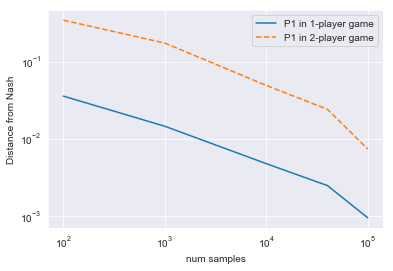

In [18]:
plt.plot(num_rounds_lst[1:], theta_diff_p1[1:], label = 'P1 in 1-player game')

plt.plot(num_rounds_lst[1:], theta_diff_p1_game[1:], linestyle = '--', label = 'P1 in 2-player game')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("num samples")
plt.ylabel(r"Distance from Nash")
plt.legend()

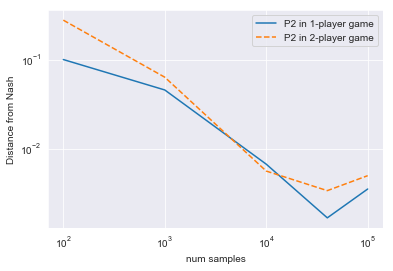

In [20]:
plt.plot(num_rounds_lst[1:], theta_diff_p2[1:], label = 'P2 in 1-player game')

plt.plot(num_rounds_lst[1:], theta_diff_p2_game[1:], linestyle = '--', label = 'P2 in 2-player game')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("num samples")
plt.ylabel(r"Distance from Nash")
plt.legend()

In [7]:
#np.save("/Users/adhyyan/Desktop/theta_diff_p1.npy", theta_diff_p1)
#np.save("/Users/adhyyan/Desktop/theta_diff_p2.npy", theta_diff_p2)

In [11]:
theta_diff_p1_game = np.load("/Users/adhyyan/Desktop/theta_diff_p1.npy")
theta_diff_p2_game = np.load("/Users/adhyyan/Desktop/theta_diff_p2.npy")